In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import csv
from chinese_calendar import is_holiday
import datetime

In [4]:
links = {}
with open("../datasets/gy_link_info.txt") as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=";")
    header = next(csv_reader)
    for row in csv_reader:
        ID = row[0]
        length = int(row[1])
        width = int(row[2])
        links[ID] = [length, width]

In [5]:
data = []
with open("../datasets/gy_link_top.txt") as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=";")
    header = next(csv_reader)
    for row in csv_reader:
        ID = row[0]
        in_links = [-1 if link == "" else int(link) for link in row[1].split("#")]
        out_links = [0 if link == "" else int(link) for link in row[2].split("#")]
        data.append([ID, in_links, out_links])
MAP = dict(zip([ID[0] for ID in data], [X[1:] for X in data]))

In [71]:
def load_data(filename):
    data = []
    with open(filename) as csvfile:
        csv_reader = csv.reader(csvfile, delimiter=";")
        next(csvfile)
        for row in csv_reader:
            ID = row[0]
            date = [int(x) for x in row[1].split("-")]
            [start, end] = row[2].split(",")
            time_interval = [int(i) for i in start[12:].split(":")]
            travel_time = float(row[3])
            data.append([ID, date[0], date[1], date[2], time_interval[0] * 60 + time_interval[1] + 1, travel_time])
    return data

In [72]:
row_data1 = load_data("../datasets/gy_link_travel_time_part1.txt")

In [10]:
def sort_samples_by_link(data):
    sorted_data = {}
    for record in data:
        if record[0] in sorted_data.keys():
            sorted_data[record[0]].append(record[1:])
        else: sorted_data[record[0]] = [record[1:]]
    return sorted_data

In [11]:
SortedRowDataByLink1 = sort_samples_by_link(row_data1)
SortedRowDataByLink2 = sort_samples_by_link(row_data2)
SortedRowDataByLink3 = sort_samples_by_link(row_data3)

In [12]:
len(list(SortedRowDataByLink1.keys()))

132

In [13]:
def sort_samples_by_time(data):
    sorted_data = {}
    for links in data:
        sorted_data[links] = sorted(data[links], key=lambda x: (x[0]-2016)*500000 + x[1]*45000 + x[2]*1440 + x[3])
    return sorted_data

In [14]:
SortedRowDataByTime1 = sort_samples_by_time(SortedRowDataByLink1)
SortedRowDataByTime2 = sort_samples_by_time(SortedRowDataByLink2)
SortedRowDataByTime3 = sort_samples_by_time(SortedRowDataByLink3)

In [15]:
def is_weekend(day):
    if (day.weekday() == 4 or day.weekday() == 5):
        return True
    else: return False

In [16]:
def feature_expand(data):
    expanded_data = {}

    for each in data:
        expanded_data[each] = np.zeros((len(data[each]), 75))
        for i in range(len(data[each])):
            day = datetime.date(data[each][i][0], data[each][i][1], data[each][i][2])

            # year
            year = data[each][i][0] - 2016
            expanded_data[each][i, 0] = year
            
            # month
            expanded_data[each][i, data[each][i][1]-2] = 1

            # weekday
            expanded_data[each][i, 6 + day.weekday()] = 1

            # day of month
            expanded_data[each][i, 13 + data[each][i][2]-1] = 1

            # hour of day
            expanded_data[each][i, 44 + (data[each][i][3]//60)] = 1

            # time_of_day
            expanded_data[each][i, 68] = data[each][i][3]

            # is_holiday
            expanded_data[each][i, 69] = int(is_holiday(day))

            # is_weekend
            expanded_data[each][i, 70] = int(is_weekend(day))

            # width
            expanded_data[each][i, 71] = links[each][1]

            # length
            expanded_data[each][i, 72] = links[each][0]

            # speed
            expanded_data[each][i, 73] = links[each][0] / data[each][i][4]

            # travel_time
            expanded_data[each][i, 74] = data[each][i][4]

    return expanded_data

In [20]:
ExpandedData1 = feature_expand(SortedRowDataByTime1)
ExpandedData2 = feature_expand(SortedRowDataByTime2)
ExpandedData3 = feature_expand(SortedRowDataByTime3)

In [21]:
for each in ExpandedData1.keys():
    print(ExpandedData1[each].shape)

(63305, 75)
(62490, 75)
(56926, 75)
(54646, 75)
(56841, 75)
(53224, 75)
(65195, 75)
(58451, 75)
(63039, 75)
(60698, 75)
(58921, 75)
(62121, 75)
(57222, 75)
(56309, 75)
(64039, 75)
(62544, 75)
(66134, 75)
(62383, 75)
(59739, 75)
(48605, 75)
(57727, 75)
(61501, 75)
(57767, 75)
(58594, 75)
(61626, 75)
(61500, 75)
(56631, 75)
(62293, 75)
(57249, 75)
(62826, 75)
(62288, 75)
(55589, 75)
(64158, 75)
(57284, 75)
(54523, 75)
(62312, 75)
(61629, 75)
(61587, 75)
(53887, 75)
(54336, 75)
(63641, 75)
(45168, 75)
(63184, 75)
(53398, 75)
(64592, 75)
(63646, 75)
(57449, 75)
(51559, 75)
(59865, 75)
(57331, 75)
(61067, 75)
(64403, 75)
(63395, 75)
(63795, 75)
(64178, 75)
(50787, 75)
(56393, 75)
(66501, 75)
(55391, 75)
(60977, 75)
(52407, 75)
(60403, 75)
(41392, 75)
(66152, 75)
(62692, 75)
(62229, 75)
(48315, 75)
(61927, 75)
(63517, 75)
(52902, 75)
(62814, 75)
(55243, 75)
(48825, 75)
(60498, 75)
(64434, 75)
(64286, 75)
(62070, 75)
(59415, 75)
(57154, 75)
(59501, 75)
(63123, 75)
(64629, 75)
(58903, 75)
(457

In [24]:
def save_expanded_data(data, filename):
    with open("../datasets/%s.csv" % (filename), "w", newline="") as f:
        csv_writer = csv.writer(f)
        for each in data:
            for i in range(len(data[each])):
                row = [each]
                row.extend(data[each][i])
                csv_writer.writerow(row)

## 08/02/2024

In [1]:
from functions import *

## Input data structure:
target shape: (num_of_records, num_of_links, num_of_features), in time sequence

features: year, month, is_weekday, is_holiday, is_rush_hour, (is_missing,) link_width, average_speed


In [2]:
links = getStaticLinkData()

In [3]:
adj_matrix = getSpatialData()

In [4]:
samples = getTemporalData()

In [5]:
start_time = datetime(2016, 3, 1)
end_time = datetime(2016, 6, 1)

In [6]:
sortedData = sortLinks(samples, start_time, end_time, links[:, 1], True)

In [7]:
def generateInOutSeq(
        data : tf.Tensor, 
        spac_data : tf.Tensor, 
        stat_data : tf.Tensor,
        in_length : int, 
        out_length : int, 
        batch_size : int):
    '''
    data shape: [in_length + b + out_length, 132, 18]
    in (x) shape: [b, in_length, 132, 18]
    out (y) shape: [b, out_length, 132, 1] -> [b, out_length, 132]
    '''
    b = data.shape[0] - in_length - out_length
    while True:
        for i in range(0, b, batch_size):
            x_batch = np.zeros((batch_size, in_length, data.shape[1], data.shape[2]))
            y_batch = np.zeros((batch_size, out_length, data.shape[1]))
            for j in range(min(batch_size, b - i)):
                current = i + j
                x_batch[j] = data[current:current+in_length]
                y_batch[j] = data[current+in_length:current+in_length+out_length, :, -1]
            yield ((
                x_batch, 
                tf.broadcast_to(spac_data, [batch_size, ] + spac_data.shape), 
                tf.broadcast_to(stat_data, [batch_size, ] + stat_data.shape)
                ), y_batch
            )

In [8]:
spac_data = adj_matrix[0]
stat_data = tf.reshape(links[:, 2], (links.shape[0], 1))

In [9]:
temp_train = sortedData[:-VALIDATION_LEN-TEST_LEN]
temp_valid = sortedData[-VALIDATION_LEN-TEST_LEN:-TEST_LEN]
temp_test = sortedData[-TEST_LEN:]

In [10]:
train_generator = generateInOutSeq(temp_train, spac_data, stat_data, INPUT_LENGTH, PRIDICT_LENGTH, BATCH_SIZE)
validation_generator = generateInOutSeq(temp_valid, spac_data, stat_data, INPUT_LENGTH, PRIDICT_LENGTH, BATCH_SIZE)
test_generator = generateInOutSeq(temp_test, spac_data, stat_data, INPUT_LENGTH, PRIDICT_LENGTH, BATCH_SIZE)

In [11]:
class STLSTM(keras.Model):
    def __init__(self, temporal_input_shape, spatial_input_shape, static_input_shape, output_shape):
        super(STLSTM, self).__init__()

        # [30, 132, 18]
        self.temporal_inputs = layers.Input(
            shape=temporal_input_shape,
            name="temporal_inputs"
        )
        # [132, 132]
        self.spatial_inputs = layers.Input(
            shape=spatial_input_shape,
            name="spatial_inputs"
        )
        # [132, 1]
        self.static_inputs = layers.Input(
            shape=static_input_shape,
            name="static_inputs"
        )

        self.conv2d_temp = layers.Conv2D(
            filters=1, 
            kernel_size=(1, 1), 
            activation='relu',
            name="Conv2D_Temporal"
        )
        # self.pooling_tem = layers.MaxPool2D(pool_size=(3, 3), name="Pooling_Temporal")

        self.reshape_temp = layers.Reshape(
            target_shape=(temporal_input_shape[0], temporal_input_shape[1]),
            name="Reshape_Temporal"
        )

        self.lstm = keras.Sequential([
            layers.LSTM(units=100, dropout=0.5, return_sequences=True),
            layers.LSTM(units=100, dropout=0.5, return_sequences=True),
            layers.LSTM(units=100, dropout=0.5)
            ], name="LSTM_Layers"
        )

        self.dense_temp = keras.Sequential([
            layers.Dense(units=1000, activation='relu'),
            layers.Dense(units=output_shape[0]*output_shape[1], activation='relu')
        ], name="Dense_Temporal"
        )

        # self.dense_temp = layers.Dense(
        #     units=output_shape[0] * output_shape[1], 
        #     activation='relu',
        #     name="Dense_Temporal"
        # )

        self.reshape_temp2 = layers.Reshape(
            target_shape=(output_shape[0], output_shape[1], 1),
            name="Reshape_Temporal_2"
        )

        self.conv2d_spat = layers.Conv2D(
            filters=1, 
            kernel_size=(1, 1), 
            activation='relu',
            name="Conv2D_Spatial"
        )

        self.flatten_spat = layers.Flatten()
        self.repeat_spat = layers.RepeatVector(output_shape[0])
        self.reshape_spat = layers.Reshape(
            target_shape=(output_shape[0], spatial_input_shape[0], spatial_input_shape[1]), 
            name="Reshape_Spatial")

        self.flatten_stat = layers.Flatten()
        self.repeat_stat = layers.RepeatVector(output_shape[0])
        self.reshape_stat = layers.Reshape(
            target_shape=(output_shape[0], static_input_shape[0], static_input_shape[1]), 
            name="Reshape_Static")

        self.concatenate = layers.Concatenate(axis=-1, name="Concatenate")

        self.flatten_out = layers.Flatten()

        self.dense_out = layers.Dense(
            units=output_shape[0] * output_shape[1], 
            activation='relu',
            name="Dense_Output"
        )
        
        self.reshape_out = layers.Reshape(
            target_shape=(output_shape[0], output_shape[1]),
            name="Reshape_Output"
        )
    
    def call(self, inputs, training=None):
        temp = inputs[0]    # [30, 132, 18]
        spat = inputs[1]    # [132, 132]
        stat = inputs[2]    # [132, 1]
        
        # [30, 132, 19] -> [30, 132]
        temp = self.conv2d_temp(temp)
        temp = self.reshape_temp(temp)

        # [30, 132] -> [100]
        temp = self.lstm(temp)

        # [100] -> [15 * 132] -> [15, 132, 1]
        temp = self.dense_temp(temp)
        temp = self.reshape_temp2(temp)

        # [132, 132] -> [15, 132, 132]
        spat = self.flatten_spat(spat)
        spat = self.repeat_spat(spat)
        spat = self.reshape_spat(spat)
        # spat = self.conv2d_spat(spat)

        # spat_temp = tf.matmul(spat, temp)

        # [132, 1] -> [15, 132, 1]
        stat = self.flatten_stat(stat)
        stat = self.repeat_stat(stat)
        stat = self.reshape_stat(stat)

        # [15, 132, 1] + [15, 132, 1] + [15, 132, 1]
        al = self.concatenate([spat, temp, stat])

        al = self.conv2d_spat(al)

        # [15, 132, 3] -> [15 * 132 * 3] -> [15 * 132] -> [15, 132]
        # al = self.flatten_out(al)
        # al = self.dense_out(al)
        # al = self.conv2d_spat(al)
        al = self.reshape_out(al)

        return al

In [12]:
def createModel(temporal_shape, spatial_shape, static_shape, output_shape, loss=losses.MeanSquaredError()):
    model = STLSTM(
        temporal_input_shape=temporal_shape,
        spatial_input_shape=spatial_shape,
        static_input_shape=static_shape,
        output_shape=output_shape
    )

    model.build(input_shape=[(None, )+temporal_shape, (None, )+spatial_shape, (None, )+static_shape])
    model.compile(optimizer='adam', loss=loss)
    return model

In [13]:
model = createModel((30, 132, 18), (132, 132), (132, 1), (15, 132))
model.summary()

Model: "stlstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_Temporal (Conv2D)    multiple                  19        
                                                                 
 Reshape_Temporal (Reshape)  multiple                  0         
                                                                 
 LSTM_Layers (Sequential)    (None, 100)               254000    
                                                                 
 Dense_Temporal (Sequential  (None, 1980)              2082980   
 )                                                               
                                                                 
 Reshape_Temporal_2 (Reshap  multiple                  0         
 e)                                                              
                                                                 
 Conv2D_Spatial (Conv2D)     multiple                  135  

In [14]:

earlystop = callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=3, verbose=1, restore_best_weights=True)
history = model.fit(
    train_generator, 
    steps_per_epoch=temp_train.shape[0] // BATCH_SIZE, 
    epochs=100, 
    callbacks=earlystop, 
    validation_data=next(validation_generator)
)

Epoch 1/100


I0000 00:00:1713745604.603200   61714 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


40/62 [==================>...........] - ETA: 6s - loss: 0.0041

KeyboardInterrupt: 

In [ ]:
model.evaluate(test_generator, steps=sortedData[-TEST_LEN:].shape[0] // BATCH_SIZE)

10/10 [==============================] - 3s 282ms/step - loss: 0.0034


0.003408357733860612

In [ ]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [ ]:
import matplotlib.pyplot as plt

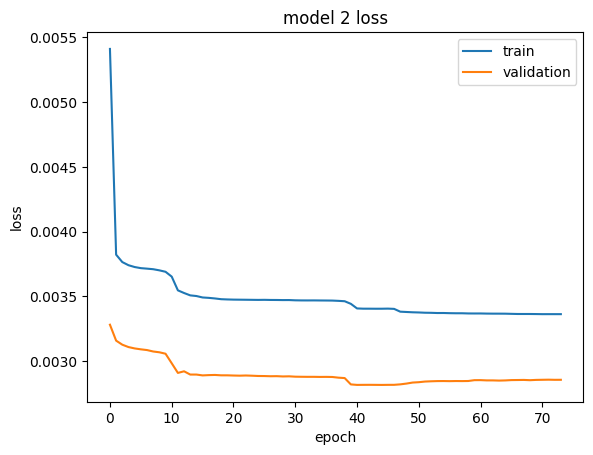

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model 2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()